## # Exploratory Data Analysis on Customer Review Data at Omega Consultancy
## 1. Import Libraries and utility functions

In [1]:
import sys
import os
from transformers import pipeline

notebook_dir = os.getcwd()  # Get current working directory (notebooks folder)
project_dir = os.path.abspath(os.path.join(notebook_dir, '..'))  # Go up one level
src_dir = os.path.join(project_dir, 'src')  # Path to scripts
sys.path.append(src_dir)

C:\Users\hp\Documents\10\omega-financial-consultancy-week2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_data import DataLoader
from clean_data import DataCleaner
from data_preprocessing import DataPreprocessor
from data_visualization import Visualizer

## 2. Importing Customer Review Data

In [3]:
customer_review = {
        "CBE": "../data/raw/Commercial Bank of Ethiopia_reviews.csv",
        "BOA": "../data/raw/BoA Mobile_reviews.csv",
        "Dashen": "../data/raw/Dashen Bank_reviews.csv"
    }
all_data = DataLoader.load_data(customer_review,customer_review)

In [4]:
print(all_data)

{'CBE':                                             Review Text  Rating  \
0                                                 dedeb       5   
1                                                  good       5   
2                                                  Good       5   
3                                                    👌👍       5   
4                                             very niec       5   
...                                                 ...     ...   
1995                                               Nice       5   
1996  Still needs development on several features......       1   
1997                  Good service at Baburehama branch       5   
1998          First and best Online banking in Ethiopia       5   
1999                                               Good       5   

                     Date                Bank/App Name       Source  
0     2025-06-04 15:04:02  Commercial Bank of Ethiopia  Google Play  
1     2025-06-04 14:59:40  Commercial Bank of E

### 3. Cleaning Data

In [5]:
cleaner = DataCleaner(output_dir="../data/processed/")
for key, data in all_data.items():
    cleaned_data = cleaner.clean_data(data, key)
    print(cleaned_data)


📊 Initial Data Description:
       Review Text       Rating                 Date  \
count         2000  2000.000000                 2000   
unique        1446          NaN                 2000   
top           Good          NaN  2024-08-28 13:18:25   
freq           130          NaN                    1   
mean           NaN     4.150500                  NaN   
std            NaN     1.440447                  NaN   
min            NaN     1.000000                  NaN   
25%            NaN     4.000000                  NaN   
50%            NaN     5.000000                  NaN   
75%            NaN     5.000000                  NaN   
max            NaN     5.000000                  NaN   

                      Bank/App Name       Source  
count                          2000         2000  
unique                            1            1  
top     Commercial Bank of Ethiopia  Google Play  
freq                           2000         2000  
mean                            NaN        

## Sentiment Analysis and Thematic Analysis

In [6]:

for key, data in all_data.items():
    processor = DataPreprocessor(data)
    cleaned_df = cleaner.clean_data(data, key)

    # Work on a copy for further feature engineering
    df = cleaned_df.copy()

    processor = DataPreprocessor(df)
    df[['sentiment', 'score', 'model_used']] = df['review_text'].apply(
        processor.vader_sentiment_analysis
    )
    #Work on Aggregating based on bank and rating
    mean_sentiment_agg = processor.aggregate_sentiment_by_bank_rating()

    # 🔑 Keyword Extraction using spaCy
    df['spacy_keywords'] = df['review_text'].apply(processor.extract_keywords_spacy)

    # 🔑 Keyword Extraction using TF-IDF
    df['tfidf_keywords'] = processor.extract_keywords_tfidf(df['review_text'].tolist())

    df['identified_themes'] = df.apply(
        lambda row: processor.assign_themes_to_reviews(row['review_text'], row['bank_name'], processor.bank_theme_mappings),
        axis=1
    )

    # Optionally, save the processed data to a new CSV file
    output_path = f"../data/processed/{key}_reviews_processed_for_themes.csv"
    # Select and reorder columns as specified (review id, review text, sentiment label, sentiment score, identified theme(s))
    # Assuming 'review_id' could be just the DataFrame index if not explicitly present
    final_columns = ['bank_name', 'review_text', 'sentiment','date', 'score', 'identified_themes', 'rating',
                     'spacy_keywords', 'tfidf_keywords']
    df[final_columns].to_csv(output_path, index=False)
    print(df.head(10))
    print(f"💾 Processed data for {key} saved to {output_path}")


📊 Initial Data Description:
       review_text       rating        date                    bank_name  \
count         2000  2000.000000        2000                         2000   
unique        1294          NaN         277                            1   
top           good          NaN  2025-03-31  Commercial Bank of Ethiopia   
freq           196          NaN          52                         2000   
mean           NaN     4.150500         NaN                          NaN   
std            NaN     1.440447         NaN                          NaN   
min            NaN     1.000000         NaN                          NaN   
25%            NaN     4.000000         NaN                          NaN   
50%            NaN     5.000000         NaN                          NaN   
75%            NaN     5.000000         NaN                          NaN   
max            NaN     5.000000         NaN                          NaN   

             source  
count          2000  
unique        

Generating Sentiment Trends Over Time plot...


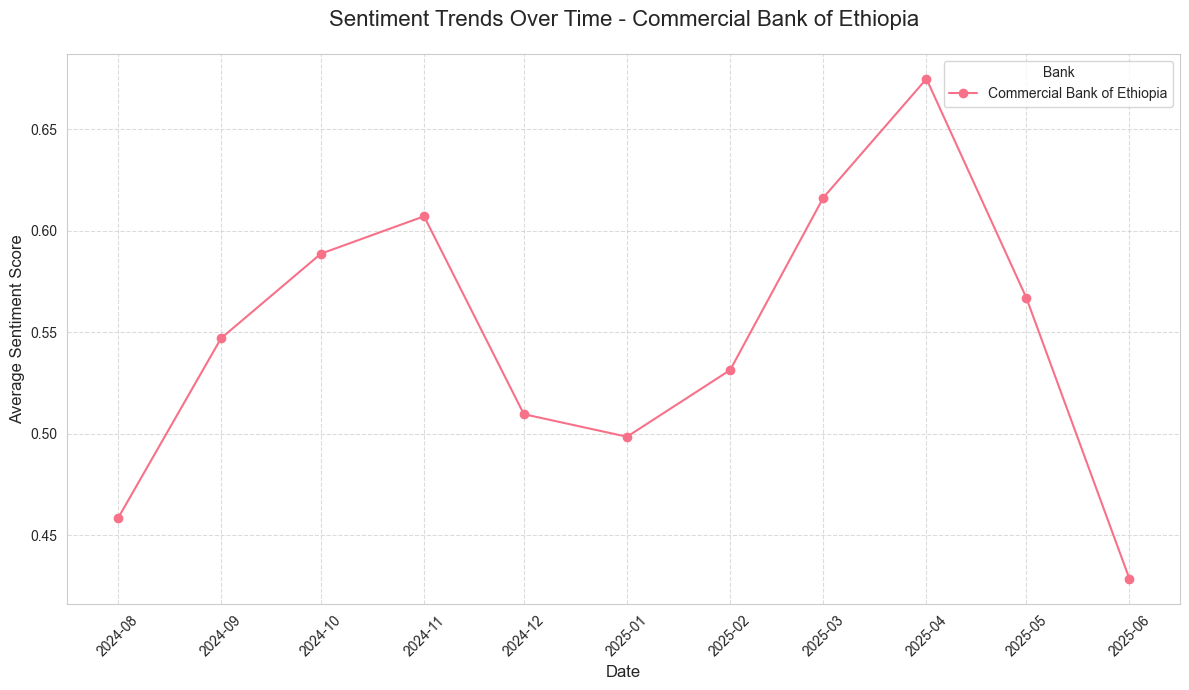

Sentiment Trends plot saved for Commercial Bank of Ethiopia: ../reports/figures\sentiment_trends_commercial_bank_of_ethiopia.png
Generating Rating Distribution by Bank plot...


C:\Users\hp\Documents\10\omega-financial-consultancy-week2\src\data_visualization.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_data, x='rating', palette='viridis')


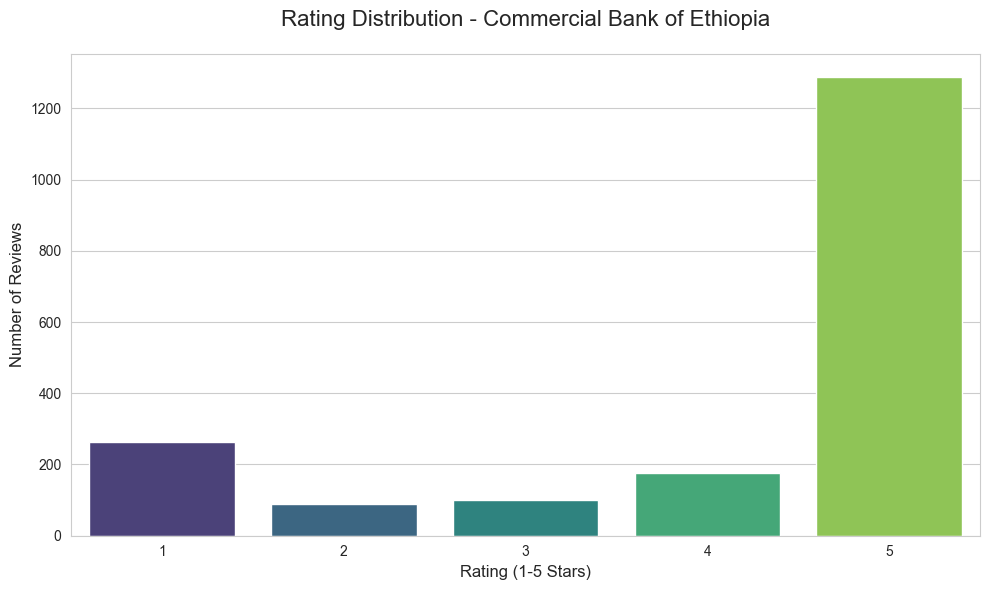

Rating Distribution plot saved for Commercial Bank of Ethiopia: ../reports/figures\rating_distribution_commercial_bank_of_ethiopia.png
Generating Keyword Clouds per Bank...


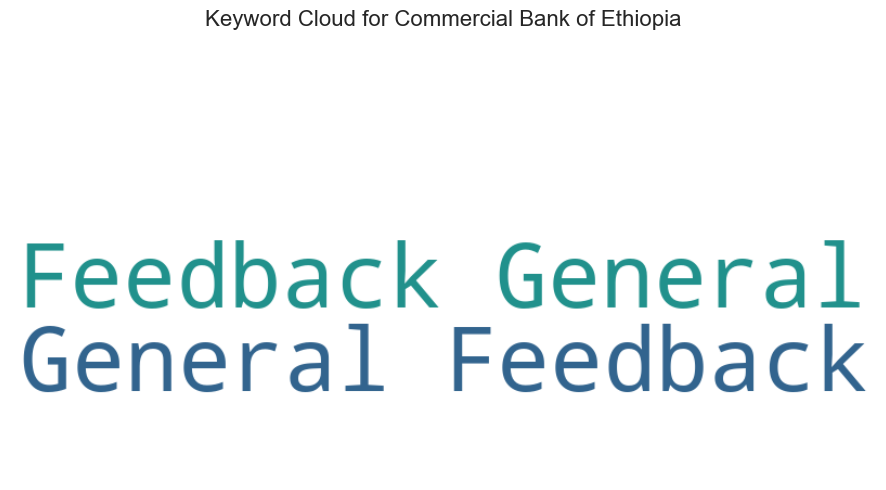

Keyword Cloud for Commercial Bank of Ethiopia saved and displayed.
Finished generating all Keyword Clouds.
Generating Insights Report...

### Comparative Analysis of 'Transaction Performance' issues ###
Insights Report saved to: ../reports/insights_report.md
Generating Sentiment Trends Over Time plot...


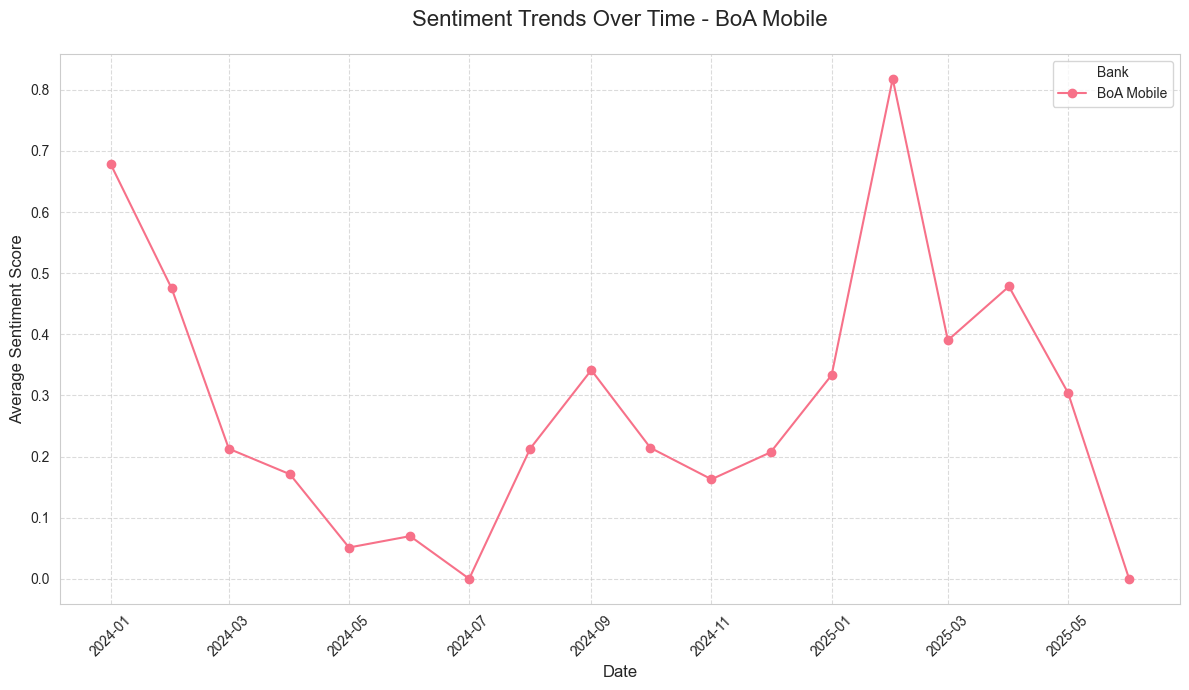

Sentiment Trends plot saved for BoA Mobile: ../reports/figures\sentiment_trends_boa_mobile.png
Generating Rating Distribution by Bank plot...


C:\Users\hp\Documents\10\omega-financial-consultancy-week2\src\data_visualization.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_data, x='rating', palette='viridis')


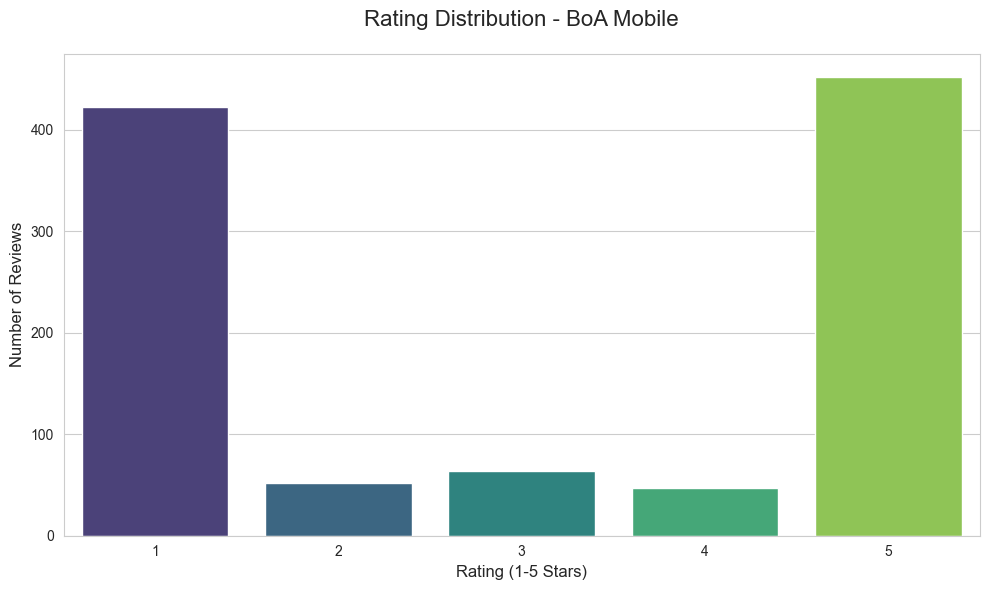

Rating Distribution plot saved for BoA Mobile: ../reports/figures\rating_distribution_boa_mobile.png
Generating Keyword Clouds per Bank...


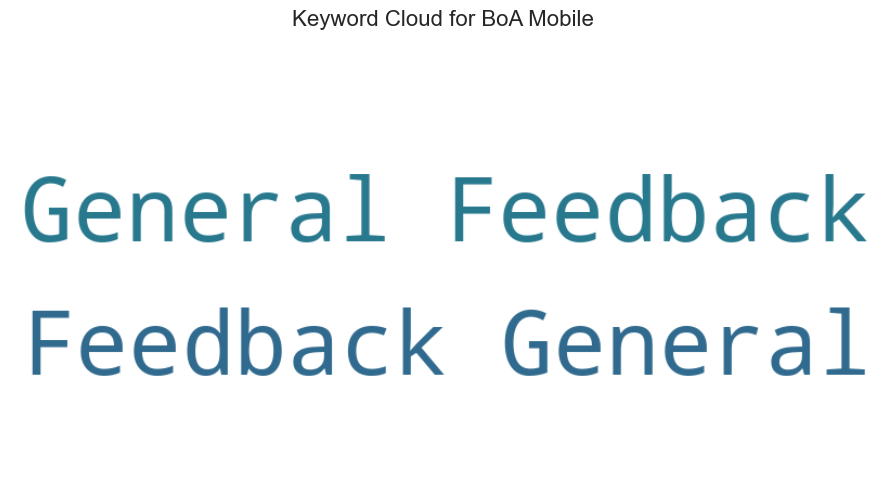

Keyword Cloud for BoA Mobile saved and displayed.
Finished generating all Keyword Clouds.
Generating Insights Report...

### Comparative Analysis of 'Transaction Performance' issues ###
Insights Report saved to: ../reports/insights_report.md
Generating Sentiment Trends Over Time plot...


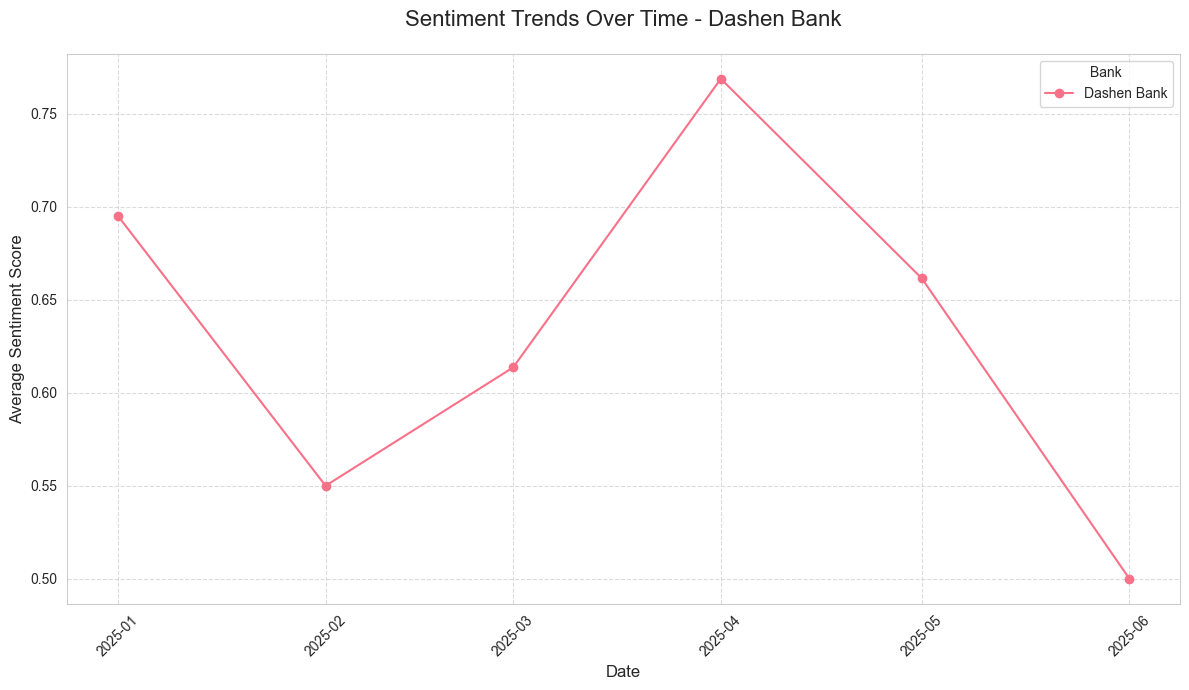

Sentiment Trends plot saved for Dashen Bank: ../reports/figures\sentiment_trends_dashen_bank.png
Generating Rating Distribution by Bank plot...


C:\Users\hp\Documents\10\omega-financial-consultancy-week2\src\data_visualization.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank_data, x='rating', palette='viridis')


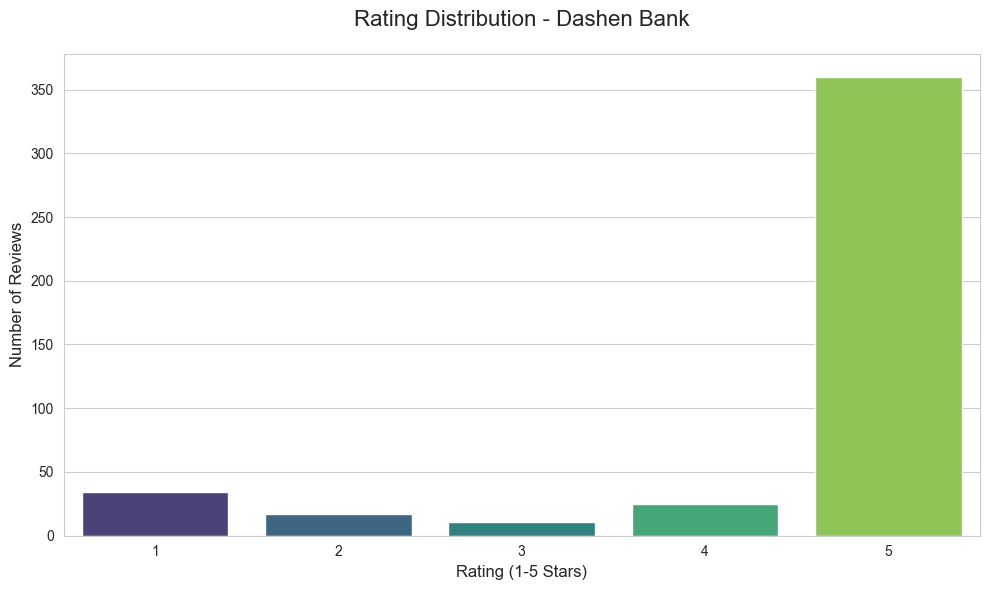

Rating Distribution plot saved for Dashen Bank: ../reports/figures\rating_distribution_dashen_bank.png
Generating Keyword Clouds per Bank...


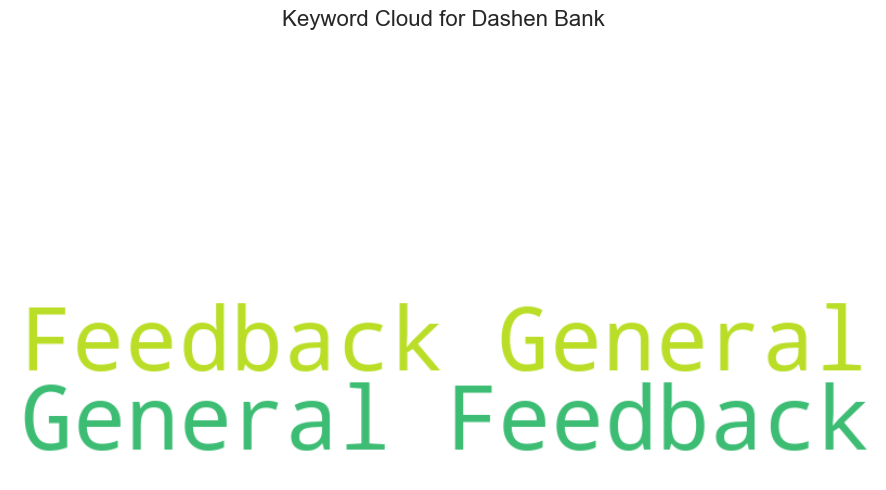

Keyword Cloud for Dashen Bank saved and displayed.
Finished generating all Keyword Clouds.
Generating Insights Report...

### Comparative Analysis of 'Transaction Performance' issues ###
Insights Report saved to: ../reports/insights_report.md


In [7]:
df = {
    "CBE": "../data/processed/CBE_reviews_processed_for_themes.csv",
    "BOA": "../data/processed/BOA_reviews_processed_for_themes.csv",
    "Dashen": "../data/processed/Dashen_reviews_processed_for_themes.csv"
}

loader = DataLoader()
data_dict = loader.load_data(df)

for key, data in data_dict.items():

    visualizer = Visualizer(data)

    #Plot for sentiment trend
    visualizer.plot_sentiment_trends()

    #Plot rate distribution
    visualizer.plot_rating_distribution()

    #Plot Keyword cloud
    visualizer.plot_keyword_cloud()

    #generate insights
    visualizer.generate_insights_report()

